# Neural Network from Scratch

Importing NumPy, Pandas and Matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Reading the dataset

In [2]:
data = pd.read_csv('../dataset/train.csv')
data = np.array(data)
m, n = data.shape
print("Data array shape : " + str(m) + " x " + str(n))

Data array shape : 42000 x 785


Shuffling the dataset, and splitting it into dev and test sets

In [3]:
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
print("X_dev shape   : " + str(X_dev.shape))
print("Y_dev shape   : " + str(Y_dev.shape))

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
print("X_train shape : " + str(X_train.shape))
print("Y_train shape : " + str(Y_train.shape))

X_dev shape   : (784, 1000)
Y_dev shape   : (1000,)
X_train shape : (784, 41000)
Y_train shape : (41000,)


Defining functions for the neural network

In [4]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    one_hot_y[np.arange(Y.size), Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def relu_derivative(Z):
    return Z > 0

def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_y = one_hot(Y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_parameters() 
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, Y)
        accuracy_plt.append(accuracy)
        if i % 10 == 0:
            print("Iteration : ", i)
            print("Accuracy  : ", accuracy)
    return W1, b1, W2, b2

Setting the hyperparameters : learning rate (alpha) and iteration count

In [5]:
alpha = 0.2
iterations = 500
accuracy_plt = []

Running the machine learning model on training data...

In [6]:
print("Running gradient descent...")
print("Alpha      : ", alpha)
print("Iterations : " , iterations)
print()
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations, alpha)

Running gradient descent...
Alpha      :  0.2
Iterations :  500

Iteration :  0
Accuracy  :  0.11360975609756098
Iteration :  10
Accuracy  :  0.30360975609756097
Iteration :  20
Accuracy  :  0.4385609756097561
Iteration :  30
Accuracy  :  0.539
Iteration :  40
Accuracy  :  0.6029268292682927
Iteration :  50
Accuracy  :  0.6496829268292683
Iteration :  60
Accuracy  :  0.686439024390244
Iteration :  70
Accuracy  :  0.7173414634146341
Iteration :  80
Accuracy  :  0.741
Iteration :  90
Accuracy  :  0.7609268292682927
Iteration :  100
Accuracy  :  0.777
Iteration :  110
Accuracy  :  0.788609756097561
Iteration :  120
Accuracy  :  0.777219512195122
Iteration :  130
Accuracy  :  0.8002439024390244
Iteration :  140
Accuracy  :  0.8166585365853658
Iteration :  150
Accuracy  :  0.825170731707317
Iteration :  160
Accuracy  :  0.8315853658536585
Iteration :  170
Accuracy  :  0.8365609756097561
Iteration :  180
Accuracy  :  0.840609756097561
Iteration :  190
Accuracy  :  0.8446341463414634
Iteratio

Saving the model as a NumPy Zip File

In [7]:
np.savez('model.npz', W1, b1, W2, b2)

Plotting the accuracy over the number of iterations...

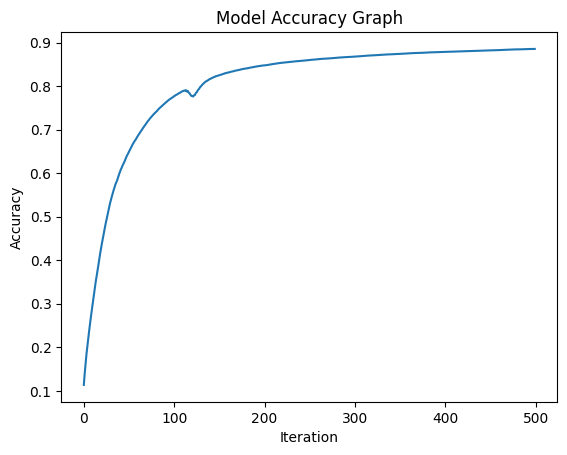

In [9]:
plt.title("Model Accuracy Graph")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
x = list(range(len(accuracy_plt)))
plt.plot(x, accuracy_plt)
plt.show()

Defining functions to test examples

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def check_train_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Testing examples

Prediction:  [1]
Label:  6


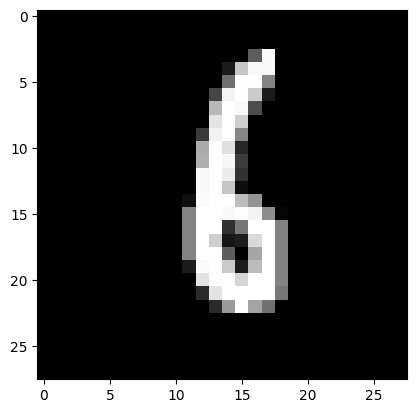

Prediction:  [4]
Label:  9


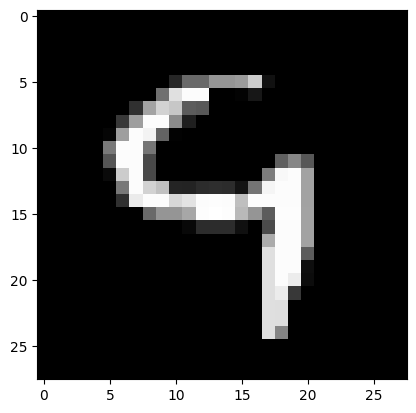

Prediction:  [2]
Label:  2


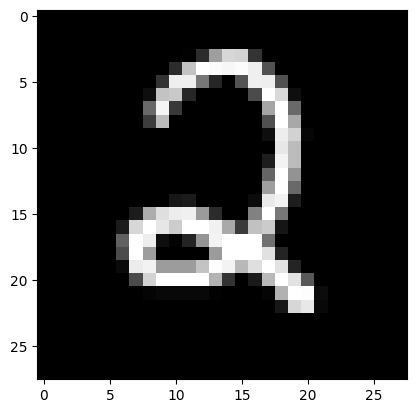

Prediction:  [3]
Label:  3


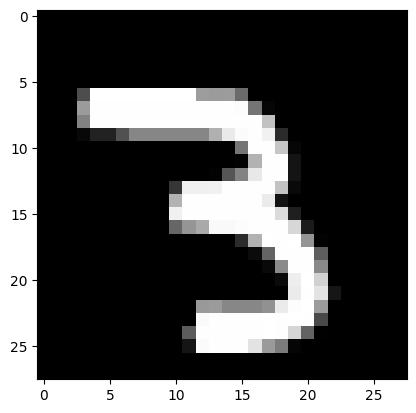

In [13]:
check_train_prediction(0, W1, b1, W2, b2)
check_train_prediction(1, W1, b1, W2, b2)
check_train_prediction(2, W1, b1, W2, b2)
check_train_prediction(3, W1, b1, W2, b2)

Testing the accuracy on dev data...

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
dev_accuracy = get_accuracy(dev_predictions, Y_dev)
print("Dev Accuracy : " + str(dev_accuracy*100) + "%")

Dev Accuracy : 88.2%


Testing on test.csv

In [19]:
test_data = pd.read_csv('../dataset/test.csv')
test_data = np.array(test_data)
m_test, n_test = test_data.shape
print("Test Data array shape : " + str(m_test) + " x " + str(n_test))

X_test = test_data.T
X_test = X_test / 255.
print("X_test shape   : " + str(X_test.shape))

test_predictions = make_predictions(X_test, W1, b1, W2, b2)
print(test_predictions)

Test Data array shape : 28000 x 784
X_test shape   : (784, 28000)
[2 0 9 ... 3 9 2]


Checking test.csv predictions...

In [20]:
def check_test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", prediction)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]


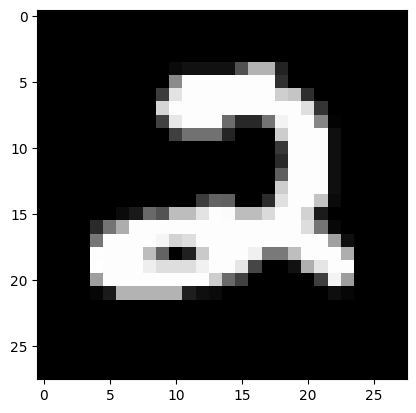

Prediction:  [9]


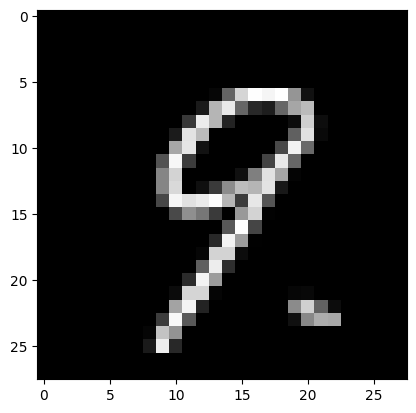

Prediction:  [0]


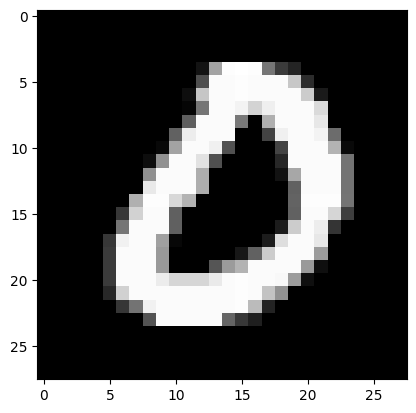

Prediction:  [3]


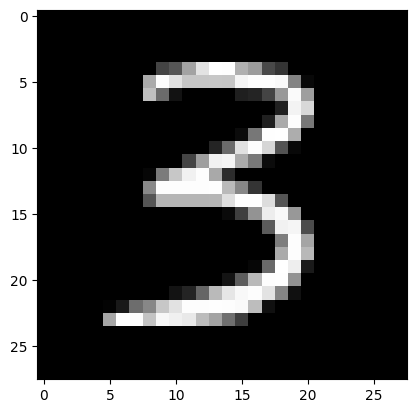

In [22]:
check_test_prediction(0, W1, b1, W2, b2)
check_test_prediction(2, W1, b1, W2, b2)
check_test_prediction(6, W1, b1, W2, b2)
check_test_prediction(9, W1, b1, W2, b2)